# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
#Loading some neccessary libs
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading the Ablone Dataset 
d1 = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
d1.head(20)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [7]:
d1['Rings'].value_counts().sum()

4177

In [8]:
d1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
d1.columns.value_counts().sum()
# so total  we  have 9 columns  where  8  are  independent  cols  or features  while Rings  col as  the  dependent  col

9

In [10]:
#Searching for all the NA-values
d1.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

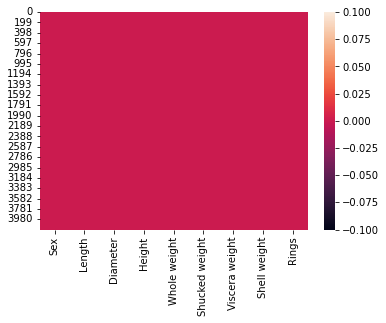

In [11]:
sns.heatmap(ablone_data.isnull())

In [13]:
#Checking for Categoriacal values and encoding them
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
d1['Sex'] = lbl.fit_transform(d1['Sex'])
d1['Sex']


0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int64

# Exploration of the Data(EDA)

Text(0.5, 1.0, 'sex_counts')

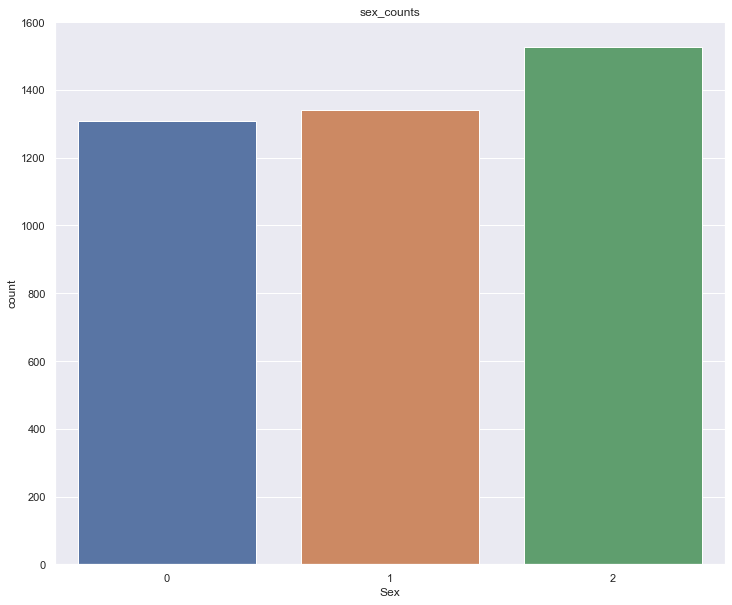

In [15]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.countplot(data=d1, x ='Sex')
plt.title('sex_counts')

In [16]:
d1.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Length effect on rings')

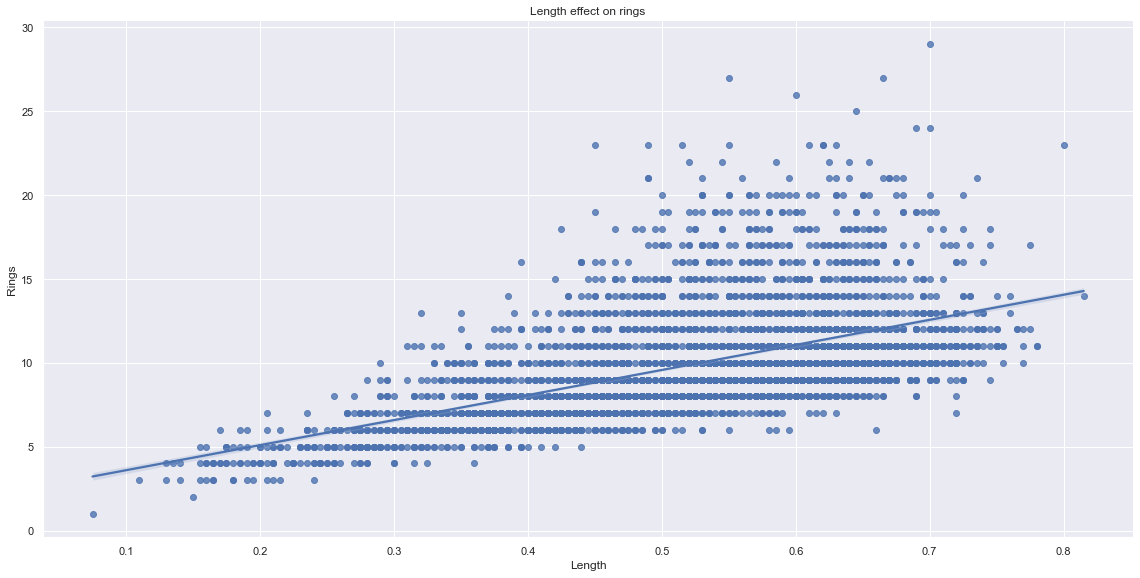

In [18]:
sns.lmplot(data=d1, x ='Length', y ='Rings', palette ='autum', height =8, aspect=2)
plt.title('Length effect on rings')

increase in length is directly proportional to value of rings columns

Text(0.5, 1.0, 'Diameter  effect on  the Rings')

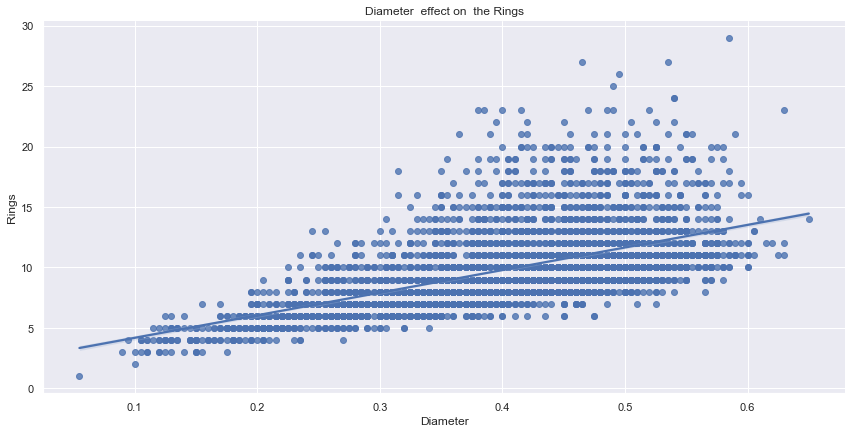

In [19]:
sns.lmplot(data=ablone_data, x ='Diameter', y ='Rings', height =6, aspect =2)
plt.title('Diameter  effect on  the Rings')

Text(0.5, 1.0, 'height measurement density ')

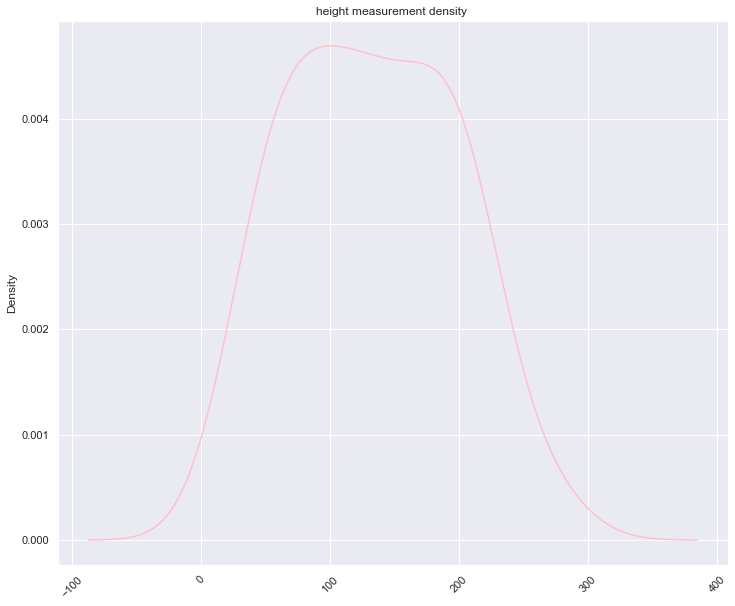

In [22]:
d1.Height.value_counts(ascending = False).head(30).plot(kind = 'kde', color='pink')
plt.xticks(rotation = 45);
plt.title('height measurement density ')

Text(0.5, 1.0, 'effect of height on Rings')

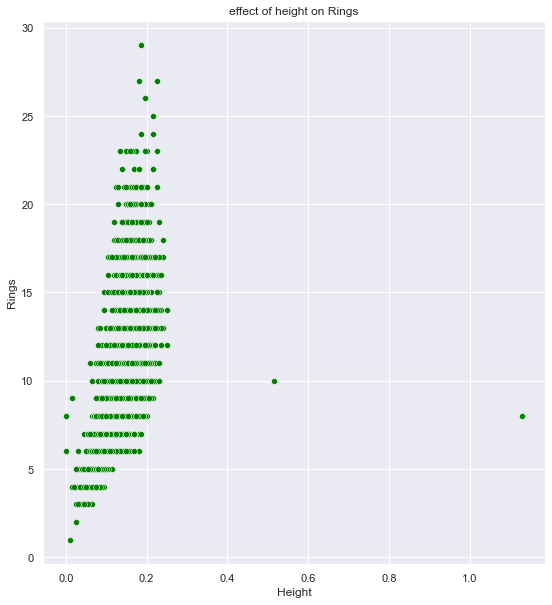

In [24]:
sns.set(rc={"figure.figsize":(9, 10)})
sns.scatterplot(data=ablone_data, x='Height',  y='Rings', color ='green')
plt.title('effect of height on Rings')

Text(0.5, 1.0, 'Density  of  the weights of  the Ablone')

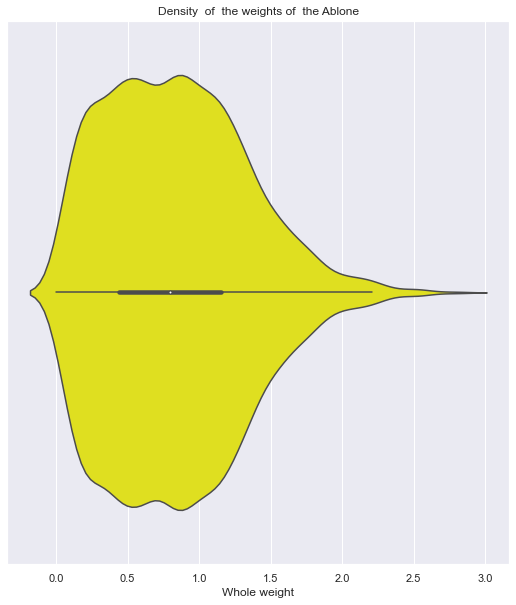

In [25]:
sns.violinplot(data=ablone_data, x ='Whole weight', color ='yellow')
plt.title('Density  of  the weights of  the Ablone')

the ablone has max density of weight between 0.5 to 1.0

Text(0.5, 1.0, 'affect of the inside weight on age ')

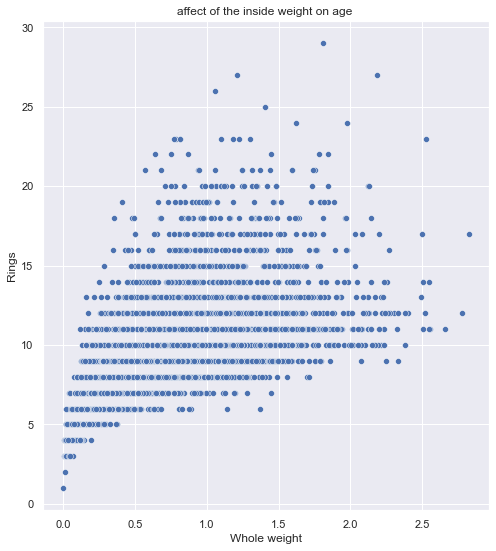

In [26]:
sns.set(rc={"figure.figsize":(8, 9)})
sns.scatterplot(data=d1, x='Whole weight', y ='Rings')
plt.title('affect of the inside weight on age ')

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

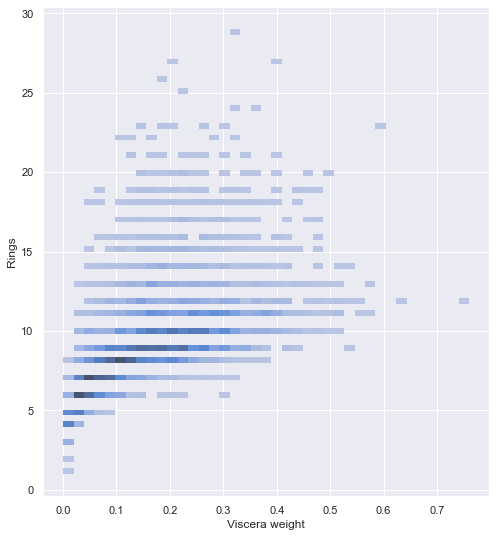

In [27]:
sns.histplot(ablone_data, x ='Viscera weight',y ='Rings')

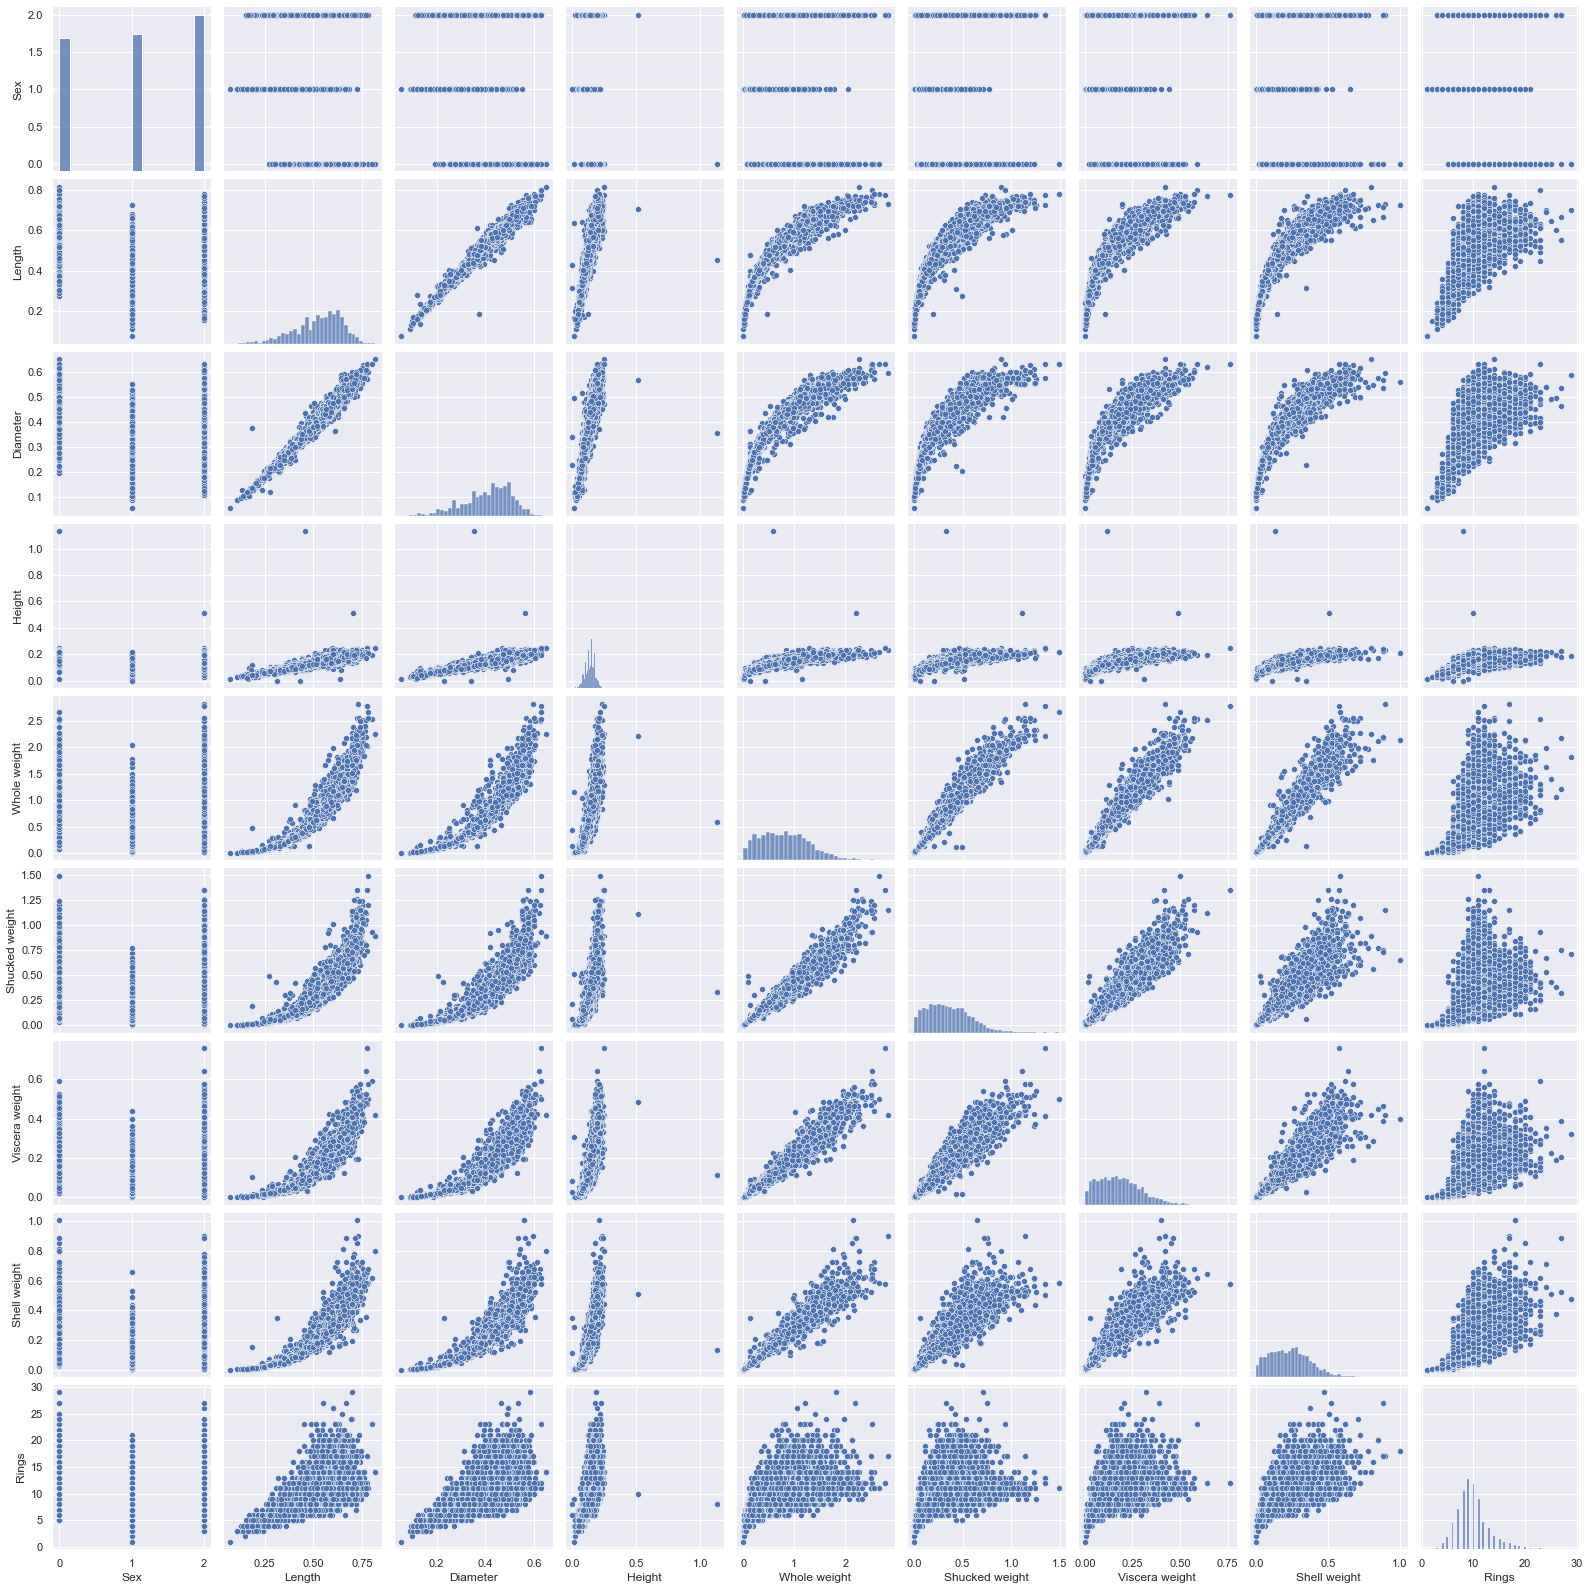

In [28]:
sns.pairplot(d1)

# Correlation 

In [30]:
d1.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

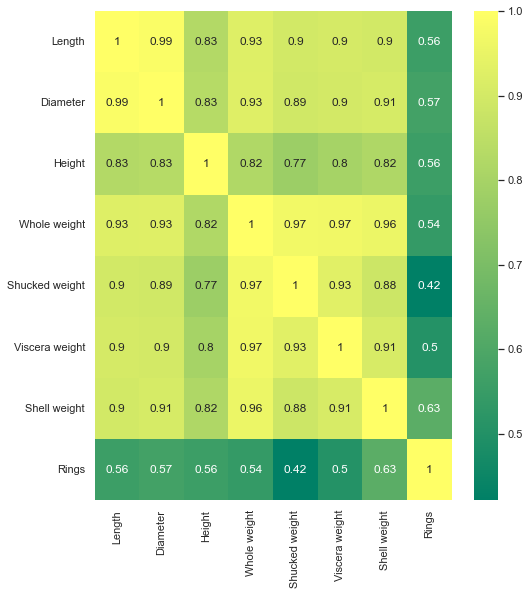

In [33]:
sns.heatmap(ablone_data.corr(), annot =True, cmap='summer')

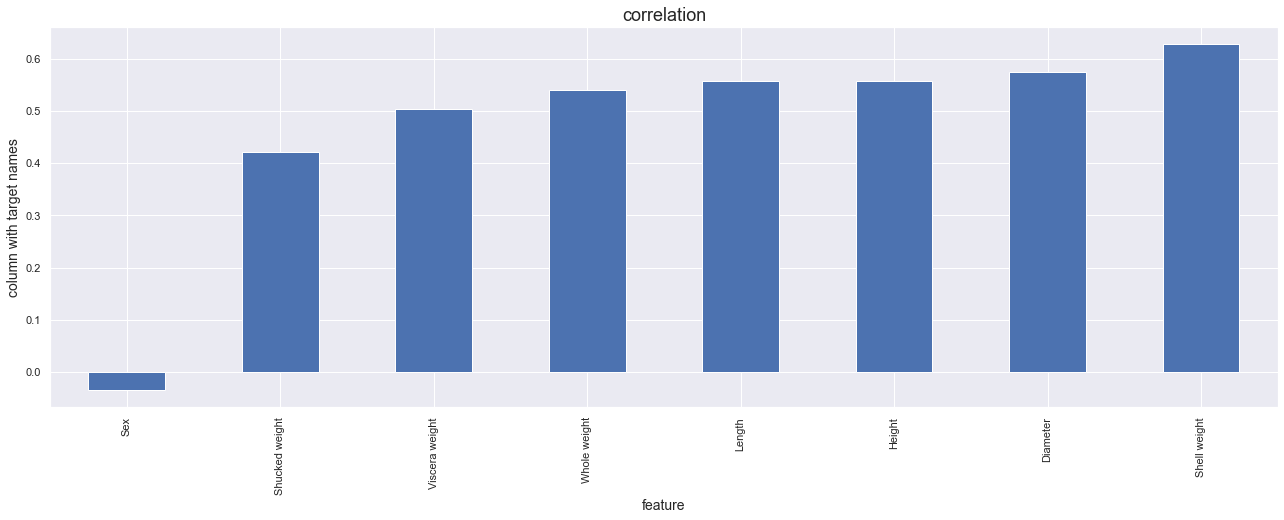

In [35]:
plt.figure(figsize=(22,7))
d1.corr()['Rings'].sort_values(ascending=True).drop(['Rings']).plot(kind='bar')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [36]:
d1['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [37]:
d1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Statistical description of the dataset

In [38]:
d1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


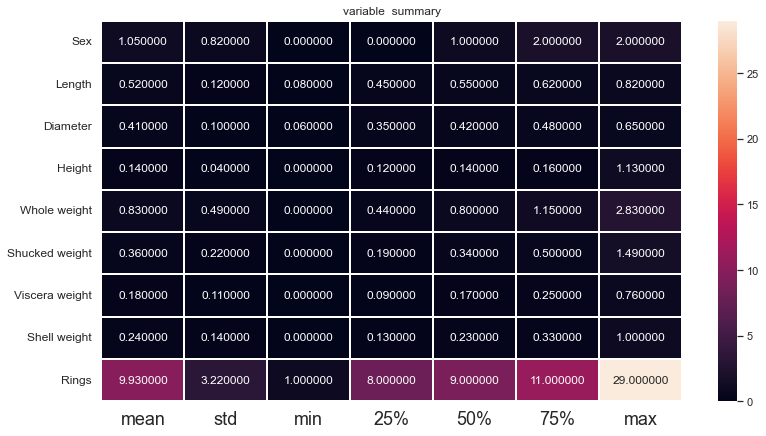

In [42]:
plt.figure(figsize=(13,7))
sns.heatmap(round(d1.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()


# Checking for the Outliers in the Dataset using Scipy

<AxesSubplot:xlabel='Length'>

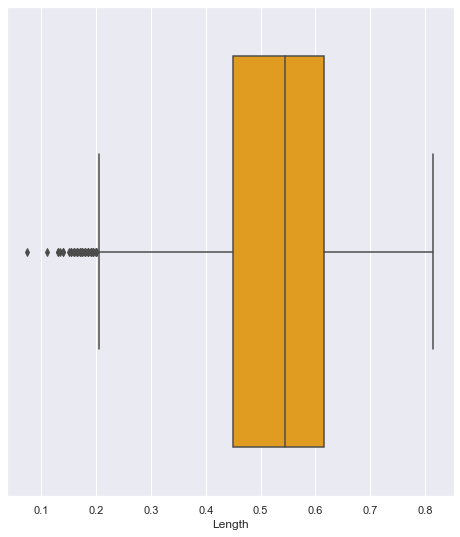

In [46]:
sns.boxplot(d1['Length'], color='orange')

<AxesSubplot:xlabel='Diameter'>

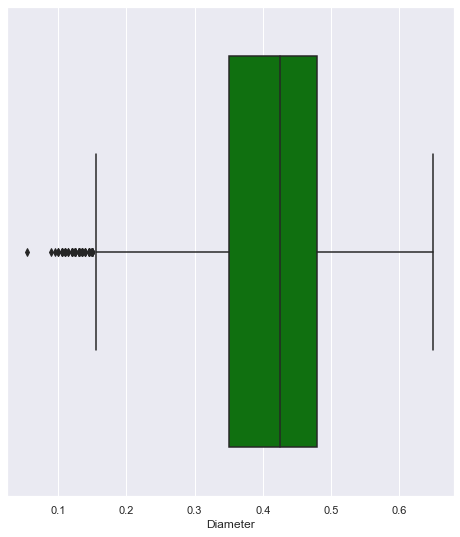

In [47]:
sns.boxplot(d1['Diameter'],color='green')

<AxesSubplot:xlabel='Whole weight'>

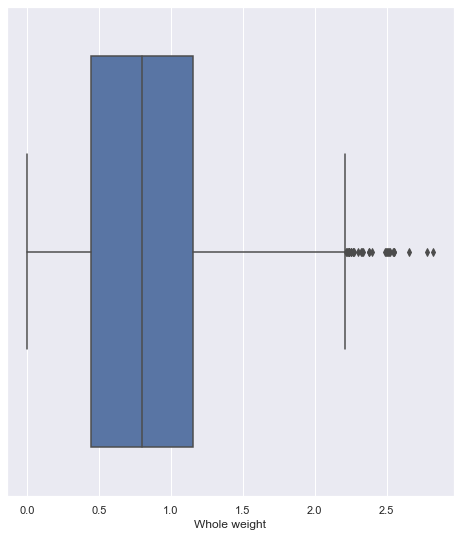

In [48]:
sns.boxplot(d1['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

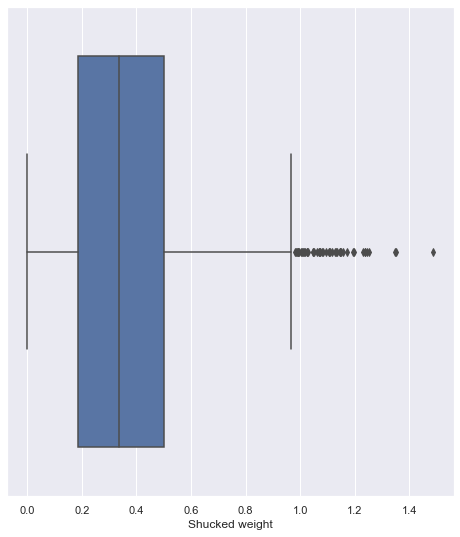

In [49]:
sns.boxplot(d1['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

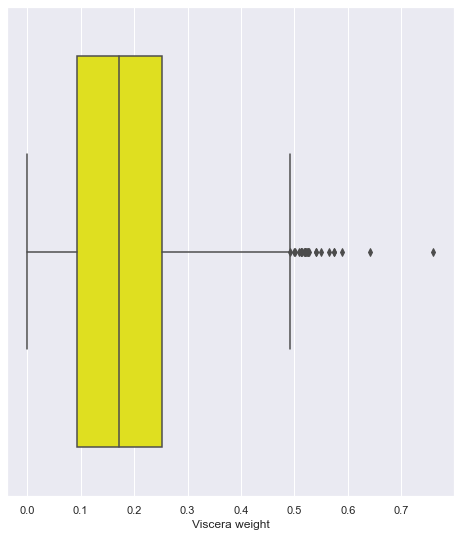

In [52]:
sns.boxplot(d1['Viscera weight'],color='yellow')

<AxesSubplot:xlabel='Shell weight'>

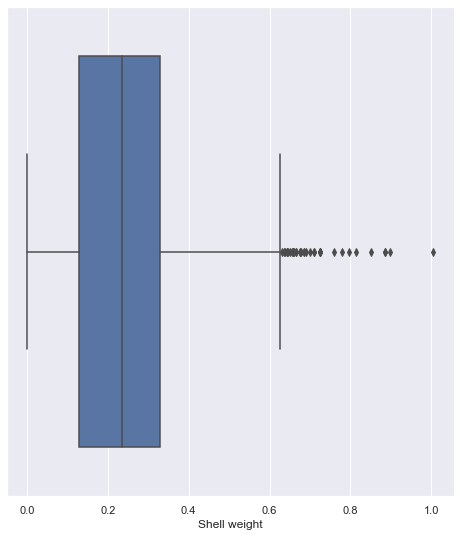

In [53]:
sns.boxplot(d1['Shell weight'])

So here we can see that all the columns leaving the sex col has some more or less of outliers present in them

# Checking for the skewness in the Dataset

In [54]:
abl_df= d1
abl_df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Graphical represntation of the skewed data

<AxesSubplot:xlabel='Height', ylabel='Density'>

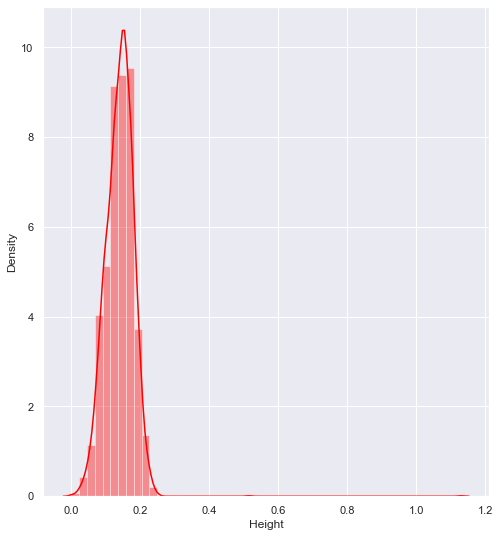

In [55]:
sns.distplot(abl_df['Height'], vertical=False, color='red')

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

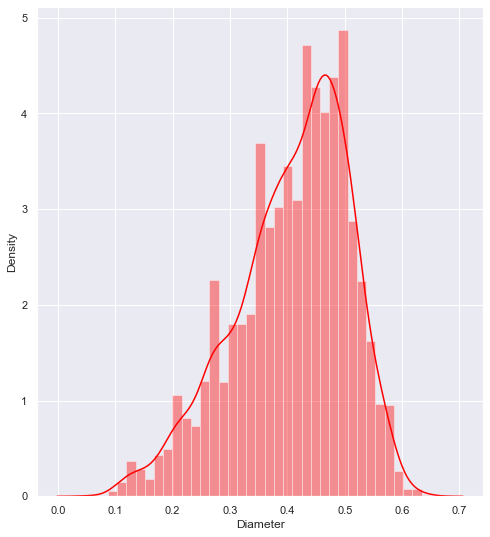

In [56]:
sns.distplot(abl_df['Diameter'], vertical=False, color='red')

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

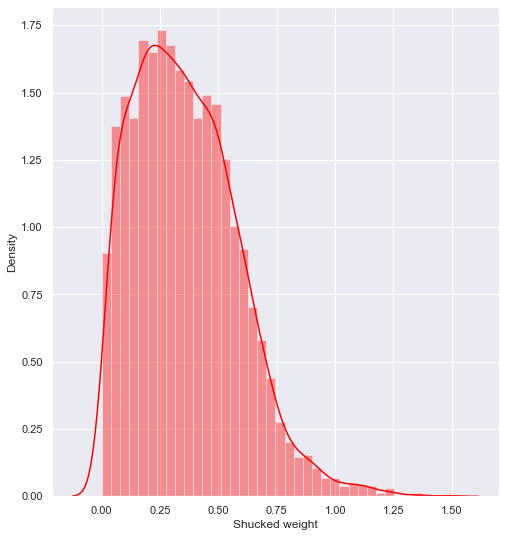

In [57]:
sns.distplot(abl_df['Shucked weight'], vertical=False, color='red')

<AxesSubplot:xlabel='Length', ylabel='Density'>

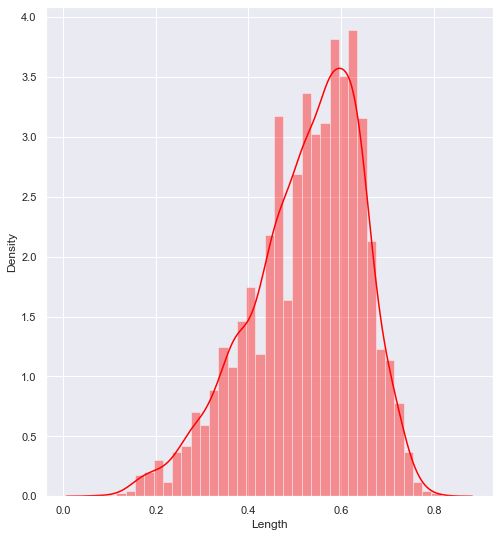

In [58]:
sns.distplot(abl_df['Length'], vertical=False, color='red')

# Data Cleaning & preprocessing

In [59]:
#Removing the outliers from the datset
#Removing the skewness
import numpy as np
abl_df["Height"]=np.sqrt(abl_df["Height"])
abl_df["Shucked weight"]=np.sqrt(abl_df["Shucked weight"])

In [60]:
import scipy 
from scipy.stats import zscore
import numpy as np

In [61]:
z= np.abs(zscore(abl_df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.081207,0.641898,0.473703,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.226890,1.230277,1.282430,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.032048,0.309469,0.307012,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.277846,0.637819,0.522695,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.530942,1.272086,1.365513,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.655163,0.118813,0.212901,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.032048,0.279929,0.490146,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.480404,0.708212,0.808489,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.320164,0.541998,0.827809,0.733627,0.410739,0.020571


In [62]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  237,
        238,  238,  238,  239,  239,  270,  275,  277,  278,  294,  306,
        310,  313,  314,  334,  351,  355,  358,  358,  362,  375,  416,
        417,  428,  431,  433,  469,  478,  480,  501,  526,  526,  530,
        572,  628,  673,  674,  675,  678,  694,  694,  696,  696,  718,
        719,  719,  719,  720,  720,  720,  744,  754,  756,  811,  891,
        891, 1048, 1051, 1052, 1174, 1204, 1206, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429, 1429, 1528,
       1757, 1759, 1762, 1762, 1763, 1763, 1763, 1986, 1987, 1987, 1987,
       2051, 2090, 2108, 2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171,
       2172, 2176, 2180, 2199, 2201, 2208, 2209, 2274, 2275, 2305, 2334,
       2334, 2334, 2335, 2344, 2358, 2368, 2381, 2381, 2436, 2459, 2471,
       2623, 2624, 2624, 2709, 2710, 2711, 2810, 2

In [63]:
abl_new= abl_df[(z<3).all(axis=1)]

In [64]:
abl_new.shape

(4037, 9)

# Percentage of Loss

In [65]:
loss_percentage = (4177-4037)/4177*100
print(loss_percentage,'%')

3.3516878142207327 %


In [66]:
x=abl_new.drop(['Rings'],axis=1)
y = abl_new.iloc[:,-1]  #  splitting the  data  into x and  y 

In [67]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.473814,0.1010,0.150
1,2,0.350,0.265,0.300000,0.2255,0.315436,0.0485,0.070
2,0,0.530,0.420,0.367423,0.6770,0.506458,0.1415,0.210
3,2,0.440,0.365,0.353553,0.5160,0.464220,0.1140,0.155
4,1,0.330,0.255,0.282843,0.2050,0.299166,0.0395,0.055


In [69]:
y.head

<bound method NDFrame.head of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4037, dtype: int64>

# Plotting the Normal distribution graphs after skewness removal

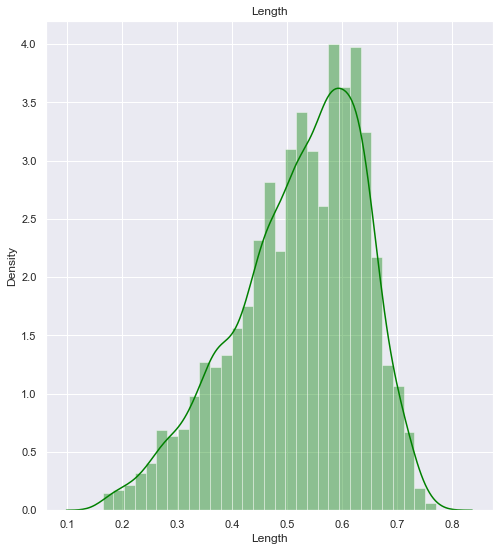

In [70]:
sns.distplot(x['Length'], color='green')
plt.title("Length")
plt.show()

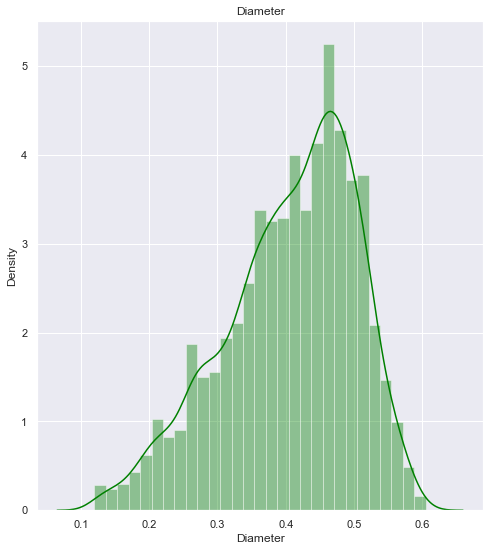

In [71]:
sns.distplot(x['Diameter'], color='green')
plt.title("Diameter")
plt.show()

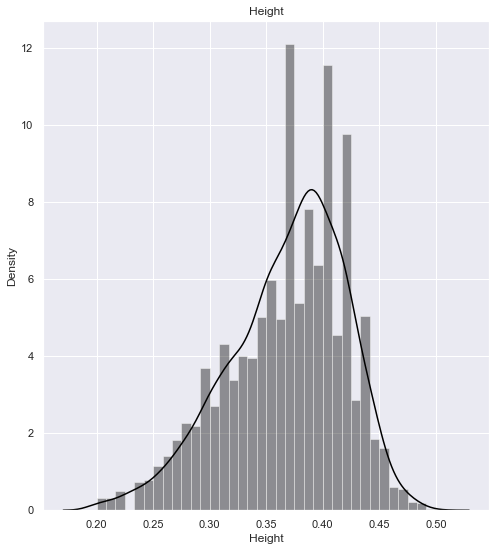

In [75]:
sns.distplot(x['Height'], color='black')
plt.title("Height")
plt.show()

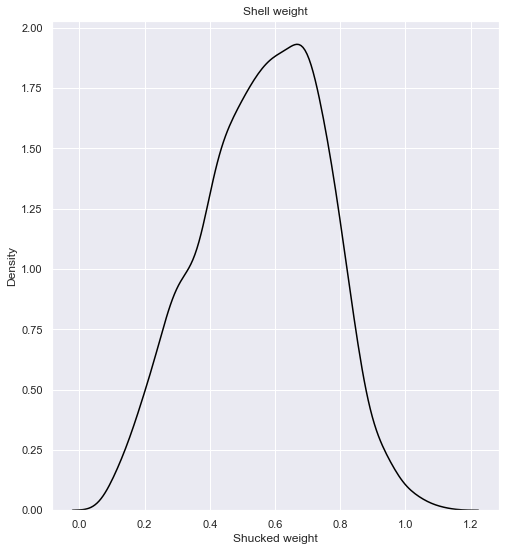

In [74]:
sns.kdeplot(x['Shucked weight'], color='black')
plt.title("Shell weight")
plt.show()

# model creation

In [76]:
# importing some base  models here,since  we  are using  Regressor  as  the label has  continous or numerical values 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

# splitting into train and test data

In [77]:
lr= LinearRegression()

In [78]:
#Choosing the best random state for our ML Model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"Best training accuracy is :{r2_score(y_train,pred_train)}, at random state : {i}")
print(f"Best test accuracy is :{r2_score(y_test,pred_test)}, at random state : {i}")

Best training accuracy is :0.4756004064224997, at random state : 99
Best test accuracy is :0.5029766882528315, at random state : 99


In [79]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=99, test_size=0.3)

# using Linear regression model

In [80]:
#taking Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression : ",r2_score(y_test,pred_test))

Accuracy score of Linear Regression :  0.5029766882528315


# Doing the Cross validation on the Linear Regression model

In [81]:
rain_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=6)
cv_mean1=cv_score.mean()

print("Cross Validation Score for Linear Regressor model: ",cv_mean1)

Cross Validation Score for Linear Regressor model:  0.3948511885600367


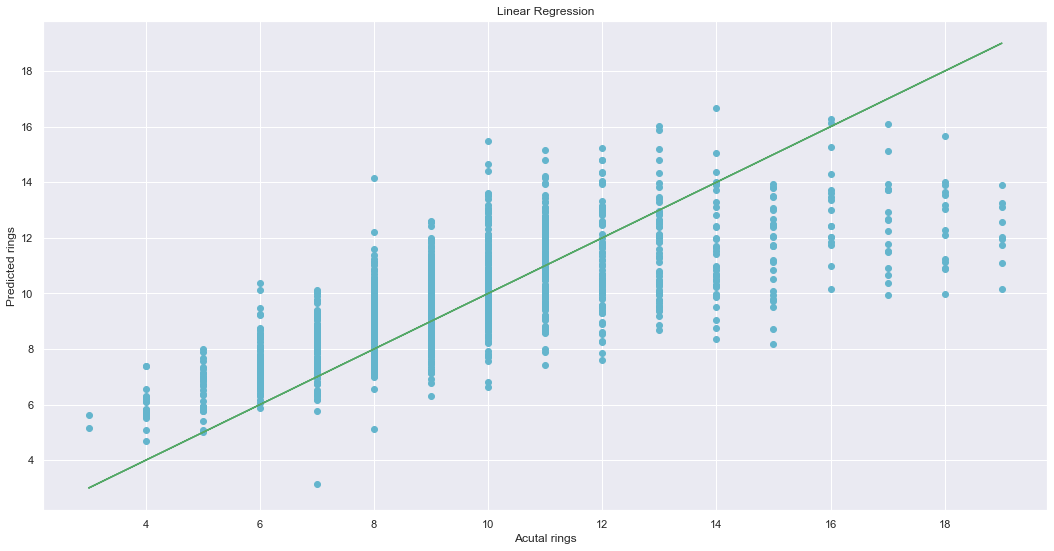

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(x=y_test,y=pred_test,color='c')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Linear Regression")
plt.show()

# Random Forest Model

In [83]:
#Taking the randomforest regressor model
rfr=RandomForestRegressor(n_estimators =200, random_state=98,bootstrap=True,)
rfr.fit(x_train,y_train)
pred_test_rf=rfr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.5029766882528315


In [84]:
#Checking the cross validation of randomforest regressor to avaoid over fiiting 

cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Random Forest Regressor model: ",cv_mean3)

Cross Validation Score for Random Forest Regressor model:  0.46228453247444284


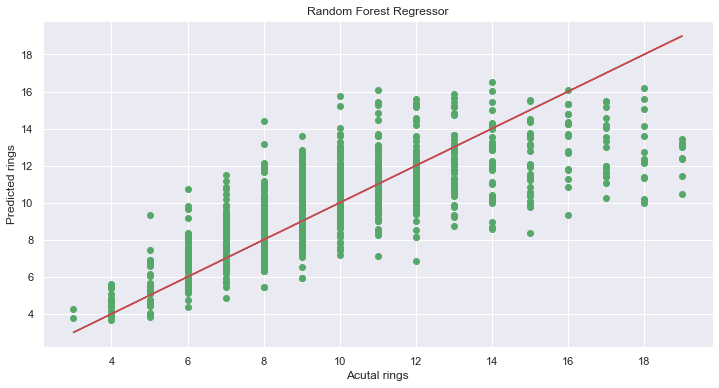

In [85]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_rf,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Random Forest Regressor")
plt.show()

# Using the GradientBoosting Algorithm

In [87]:
#Taking the randomforest regressor model
Gbr =GradientBoostingRegressor(n_estimators =1000,learning_rate =0.1 ,random_state=110, max_depth=4, alpha=0.1,n_iter_no_change=5 )
Gbr.fit(x_train,y_train)
pred_test_Gbr=Gbr.predict(x_test)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))

Accuracy Score for Random Forest Regressor :  0.5029766882528315


In [88]:
#Checking the cross validation of Gradient boosting regressor to avaoid over fiiting 

cv_score=cross_val_score(Gbr,x,y,cv=7)
cv_mean3=cv_score.mean()

print("Cross Validation Score for Gradient boosting Regressor model: ",cv_mean3)

Cross Validation Score for Gradient boosting Regressor model:  0.4813225478086931


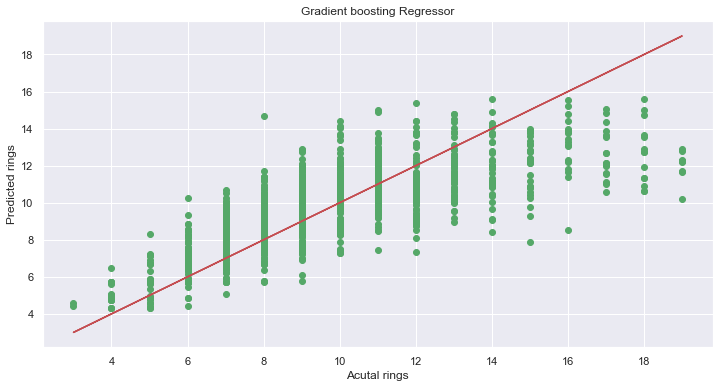

In [91]:
#Verifying the performance of the model by graph
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=pred_test_Gbr,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Acutal rings")
plt.ylabel("Predicted rings")
plt.title("Gradient boosting Regressor")
plt.show()


In [92]:
a = np.array(y_test)
predicted = np.array(Gbr.predict(x_test))
df_ablone = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_ablone

,orginal,predicted
0,7,7.505005
1,9,9.568573
2,9,9.985988
3,8,10.194132
4,11,10.901263
...,...,...
1207,8,6.359503
1208,11,11.754510
1209,13,10.866234
1210,12,8.892409


In [93]:
df = df_ablone.to_csv('ablone_prediction.csv')

# we are done with our predictive working model